## Exercise 1: Various kernels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib as mpl
import utils.A3
from sklearn.model_selection._validation import cross_val_score

X = np.loadtxt('data/mnistsub.csv', delimiter=',', usecols=(0,1))
y = np.loadtxt('data/mnistsub.csv', delimiter=',', usecols=(2))

Spliting the data into a validation set on 20% used for the hyperparamether tuning and 80% used to score and plot the results
random state set to 42 to get the same values every time I execute the code, i.e the same values in validaion and test sets

In [15]:
X_validation, X_test, y_validation, y_test = train_test_split(X, y, test_size=0.8, random_state=42) 

<ul>
   <li>Tune hyperparamters using sklearn GridSearchCV</li>
</ul>
<table>
    <thead>
        <tr><th>Kernel</th><th>Hyperparameters to tune</th></tr>
    </thead>
    <tbody>
        <tr><td>Linear</td><td>C</td></tr>
        <tr><td>rbf</td><td>C, gamma</td></tr>
        <tr><td>Poly</td><td>C, gamma, degree</td></tr>
    </tbody>
</table>


In [16]:
params = [
    {'kernel':['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel':['rbf'], 'C': [0.5, 1, 100, 1000], 'gamma': [0.3, 0.005] },
    {'kernel':['poly'], 'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.0001], 'degree': [2]},
]
svc = SVC()
grid_search = GridSearchCV(svc, params, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_validation, y_validation)
df = pd.DataFrame(grid_search.cv_results_)
display(df[['param_C', 'param_gamma', 'mean_test_score', 'param_kernel']])
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

,param_C,param_gamma,mean_test_score,param_kernel
0,1,NaN,0.792540,linear
1,10,NaN,0.786290,linear
2,100,NaN,0.786290,linear
3,1000,NaN,0.786290,linear
4,0.5,0.3,0.817742,rbf
5,0.5,0.005,0.704435,rbf
6,1,0.3,0.817742,rbf
7,1,0.005,0.773992,rbf
8,100,0.3,0.723387,rbf
9,100,0.005,0.805242,rbf


{'C': 0.5, 'gamma': 0.3, 'kernel': 'rbf'}
0.817741935483871
SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


<ul>
   <li>Kernels score using the best scored parameters from the Gridsearch</li>
    <br>
    <ul>
       <li>Linear kernel</li>
    </ul>
</ul>

In [18]:
clf_linear = SVC(kernel='linear', C=10)
clf_linear.fit(X_test, y_test)
score = cross_val_score(clf_linear, X_test, y_test, cv=5, scoring='accuracy')
linear_score = round(score.mean(),3) * 100
print(f'Linear model: {score.mean()}')

Linear model: 0.8038016732283465


<ul>
    <ul>
       <li>rbf kernel</li>
    </ul>
</ul>

In [19]:
clf_rbf = SVC(kernel='rbf', C=0.5, gamma=0.3)
clf_rbf.fit(X, y)
score = cross_val_score(clf_rbf, X_test, y_test, cv=5, scoring='accuracy')
rbf_score = round(score.mean(),3) * 100
print(f'RBF model: {score.mean()}')

RBF model: 0.8069758858267717


<ul>
    <ul>
       <li>poly kernel</li>
    </ul>
</ul>

In [20]:
clf_poly = SVC(kernel='poly', C=1, gamma=0.1, degree=2)
clf_poly.fit(X, y)
score = cross_val_score(clf_poly, X_test, y_test, cv=5, scoring='accuracy')
poly_score = round(score.mean(),3) * 100
print(f'Poly model: {score.mean()}')

Poly model: 0.7551058070866141


<ul>
   <li>1x3 plot oft the decision boundarys for the best models together with the data</li>
</ul>

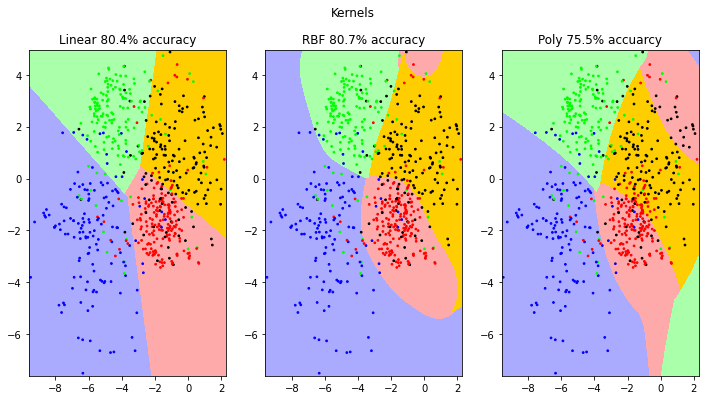

In [22]:
plt.figure(1,figsize=(12,6))
plt.suptitle('Kernels')
plt.subplot(1,3,1)
utils.A3.plot_sv_decis(clf_linear, X_test, y_test)
plt.title(f'Linear {linear_score}% accuracy')

plt.subplot(1,3,2)
utils.A3.plot_sv_decis(clf_rbf, X_test, y_test)
plt.title(f'RBF {rbf_score}% accuracy')

plt.subplot(1,3,3)
utils.A3.plot_sv_decis(clf_poly, X_test, y_test)
plt.title(f'Poly {poly_score}% accuarcy')
plt.show()